### Data BootCamp - Final Project (File 01) : 
- Dongjin Lee (djl500@stern.nyu.edu)
- Tackjin Kim     (ttk237@stern.nyu.edu) 



# Analysis of the Size of Residential Apartments in South Korea 



### 1. Background. 

The purpose of this project is to analyze the statistics regarding the size(sq.meter) of apartments in South Korea using Python. For a detailed explanation of the South Korean Apartment market, visit http://www.yourultimateapartment.com/korean-apartment-size.

### 2. Project Content & Data Explanation
##### This Project is consist of two files : File  01 : Data Analysis / File 02 : Data Collection. 

First file(file01) contains our data analysis, and the 2nd file contins the process of our data collection. Unlike the United States (ex.Pluto), South Korea does not provide the city/urban area data in the neat form. Therefore, as part of our project, we had to crawl public websites and gather the relevant data source. 

South Korea consists of 10 provinces & 8 metropolitan cities.  (See image A below). Most apartments are concentrated in Metro Cities and Kyungi, a Province Area near Seoul. Even though there are apartments in other provinces, because the amount of data is reletively small, we decided to leave it out of our analysis.

We used sqlite3(SQL) to collect database as we want to try various packages. However, we used excel as a data format for the analysis due to its familiarity and convenience. 

======================================================================================================================
#### 2-1 : Image - City and Province of South Korea

<img src="image.png">

#####           8 Metropolitan Cities
Seoul (1), Busan (2), Daegu (3), Incheon (4), Gwangju (5), Daejeon (6), Ulsan(7), Saejong 

#####           Suburban province containing majority of Apartments in South Korea:
Kyungi  (A)

=====================================================================================================================

#### 2-2 :Data Location & Other Sources

Data location
- Korean Apartment(Residential Property) Management Info System : http://www.k-apt.go.kr
- South Korea Ministry of Land and Infrastructure and Transportation : http://rt.molit.go.kr


Study Material Location, and Origin of Idea, Codes and Idioms
- NYU DATABOOTCAMP : http://databootcamp.nyuecon.com/
- Coursera : https://www.coursera.org/learn/python-network-data/
- Sqlite3 http://www.tutorialspoint.com/sqlite/sqlite_python.htm
- Openwings : http://goodvc.tistory.com/category/%EB%82%98%EC%9D%98%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D
- Code academy : https://www.codecademy.com/ko/courses/python-advanced-ko/0/1?curriculum_id=53b5e0d8fed2a81590000003
- Haeshik : http://nbviewer.ipython.org/gist/hyeshik/cf9f3d7686e07eedbfda?revision=6

All Right reserved. Source, Data, Coding Method to orginal locaiton of link mentioned above.

In [1]:
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 
import matplotlib as mpl              # graphics parameters
import numpy as np                    # numerical calculations 
%matplotlib inline

# Checking Python version 
import datetime as dt 
import sys
print('Today is', dt.date.today())
print('What version of Python are we running? \n', sys.version, sep='') 


Today is 2016-05-04
What version of Python are we running? 
3.5.1 |Anaconda 4.0.0 (64-bit)| (default, Feb 16 2016, 09:49:46) [MSC v.1900 64 bit (AMD64)]


In [2]:
# import collected data (Excel Format)
path = 'C:\\Users\\Dongjin\\Desktop\\Database-Translated2.xlsx'
Apartment_data = pd.read_excel(path)

In [3]:
Apartment_data.shape

(21675, 17)

#### 2-3 Data Dictionary
The original data set has 20 objects initially. However, during our data cleansing phase, we narrowed down to 17 objects for our analysis. Therefore, it only contains 17 columns. The following is the data dictionary of our dataset.

In [29]:
path2 = 'C:\\Users\\Dongjin\\Desktop\\dictionary.xlsx'
dictionary = pd.read_excel(path2)
dictionary

,Column / Object,Meaning
0,RecNo,Reference number
1,KAPT_USEDATE,Date built on the Apartment
2,BJ,Code number of the City
3,si,City name (Korean)
4,City,City name (English)
5,KAPTD_WTIMESUB,Time
6,SUBWAY_STATION,Subway station near the Apartment
7,SUBWAY_LINE,Subway line which stations cross
8,CODE_HALL,Apartment Type
9,KAPT_BCOMPANY,Apartment Construction Company


In [27]:
# Copying Data and preserve original data
# checking the size of the data
apt_datacopy = Apartment_data
apt_datacopy.shape

(21675, 21)

#### As mentioned in the dictionary above, in the excel sheet there are 4 columns which counted number of units based on the floor-size categorized as follows.

    KAPTDA_CNT1 = 135㎡ < 
    KAPTDA_CNT2 = 85㎡~135㎡
    KAPTDA_CNT3 = 60㎡~85㎡
    KAPTDA_CNT4 = < 60㎡
    

In [5]:
# Renaming the Column name in the dataframe
apt_datacopy.rename(columns={'KAPTDA_CNT4': 'less_than_60sqm','KAPTDA_CNT3': '60sqm-85sqm'\
                       ,'KAPTDA_CNT2': '85sqm-135sqm','KAPTDA_CNT1': '135sqm<'}, inplace=True)

In [6]:
# Insert the column Total which counts the entire number of unit apartments
apt_datacopy['Total'] = apt_datacopy['less_than_60sqm'] +  apt_datacopy['60sqm-85sqm'] +  apt_datacopy['85sqm-135sqm'] +  apt_datacopy['135sqm<']

In [30]:
# Confirm the copied dataframe
apt_datacopy.head(1)

,RecNo,KAPT_USEDATE,BJ,si,City,KAPTD_WTIMESUB,SUBWAY_STATION,SUBWAY_LINE,CODE_HALL,KAPT_BCOMPANY,...,Name,KAPT_DONG_CNT,135sqm<,85sqm-135sqm,60sqm-85sqm,less_than_60sqm,Total,Dates,Small(Total),Large(Total)
0,1,2004-06-17,11,서울특별시,Seoul,5-10 minutes,대청,3호선,계단식,화엄건설,...,LG개포자이아파트,4,0,0,0,212,212,2004-06-17,212,0


## 3. Analysis
### 3-1. Annual Growth in Apartment Units

In [8]:
# Since the data does not recognize it as a string, we converted them to date
apt_datacopy['Dates'] = pd.to_datetime(apt_datacopy['KAPT_USEDATE'],format="%m/%d/%Y")

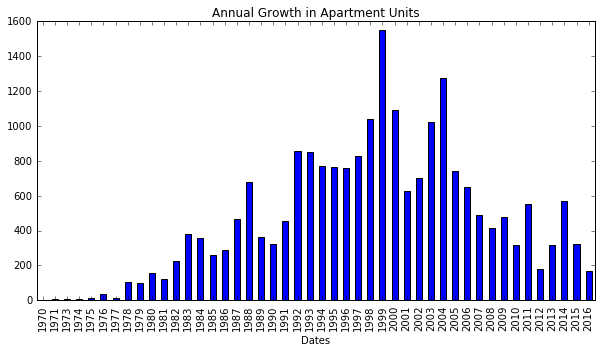

In [31]:
# Now we decide to gather them by year, and plot them with the relative size.
Annualgrowth = apt_datacopy.groupby(apt_datacopy['Dates'].map(lambda x: x.year))
Annualgrowth.count()['Total'].plot(kind='bar',title='Annual Growth in Apartment Units',color = 'b',figsize=(10,5))
plt.show()

### 3-2. Large Apartment Ratio

According to the Korean Government, residential properties larger than 85㎡  (914 sq ft) are considered "large residential property" for tax purpose. We decide to figure out the number of such large apartments in our data set and its ratio to the entire market.

Large Apartment Ratio  = (Number of Large Residential Property)/(Number of Entire Residential Property)

In [10]:

apt_datacopy['Small(Total)'] = apt_datacopy['less_than_60sqm']+apt_datacopy['60sqm-85sqm']
apt_datacopy['Large(Total)'] = apt_datacopy['85sqm-135sqm']+apt_datacopy['135sqm<']

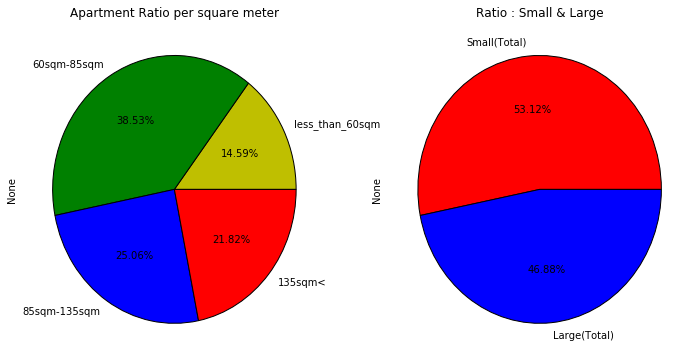

In [11]:
Chart1 = apt_datacopy[['less_than_60sqm','60sqm-85sqm','85sqm-135sqm','135sqm<']].sum()
Chart2 = apt_datacopy[['Small(Total)','Large(Total)']].sum()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].set_title('Apartment Ratio per square meter')
Chart1.plot(kind='pie', figsize=(6,6),colors=('y','g','b','r'),autopct='%.2f%%', subplots=True , ax=axes[0])
axes[1].set_title('Ratio : Small & Large')
Chart2.plot(kind='pie', figsize=(6,6),colors=('r','b'), autopct='%.2f%%', subplots=True , ax=axes[1])
plt.show()

### 3-3. Large Apartment in Each Individual City
Now lets find out the number and ratio of large apartments in each city.

In [12]:
grouped = apt_datacopy.groupby(['City'])

In [13]:
Chart3 = grouped.agg({'Small(Total)':np.sum,'Large(Total)':np.sum, 'Total':np.sum } , as_index=False ).sort(['Total'])
Chart3['Small(Ratio)'] = Chart3['Small(Total)'] /  Chart3['Total']
Chart3['Large(Ratio)'] = Chart3['Large(Total)'] /  Chart3['Total']

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


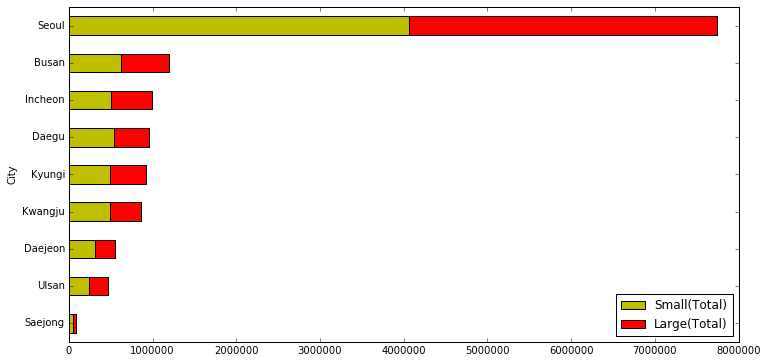

In [14]:
Chart3[['Small(Total)','Large(Total)']].plot(kind='barh', stacked=True, color =('y','r'), title='',figsize=(12,6))

Since Seoul is the capital and nearly half of the population resides there, the amount of apartment is far exceeds any other city. But what about the ratio? Let's find out. 

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


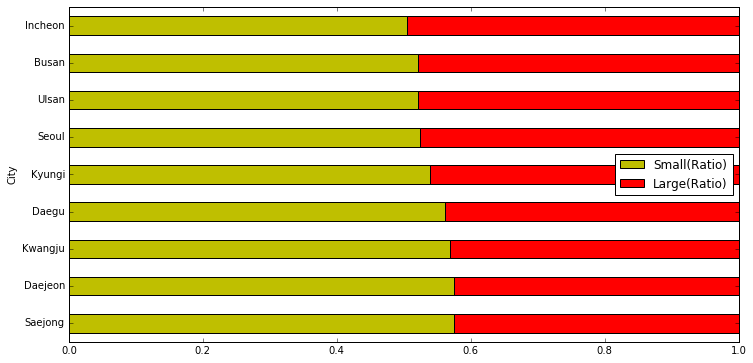

In [15]:
Chart3[['Small(Ratio)','Large(Ratio)']].sort('Large(Ratio)').plot(kind='barh', stacked=True, color =('y','r'),figsize=(12,6))

### 3-4. Factors Correlated to the Large Apartment Ratio
We tested correlation of two factors: city budget and average GDP of the city toward large apartment ratio.

In [73]:
# City Budget (Unit : 10,000 Won )
list = '''Seoul 342,751 144,328 50,993 2,231 50,362 18,603 18,182 9,560 48,492 80.0 81.2
Busan 122,222 34,647 12,207 10,658 37,213 6,932 4,639 4,746 11,180 51.4 66.6
Daegu 87,347 22,474 6,545 10,663 28,021 5,289 2,830 2,709 8,816 46.1 67.6
Incheon 113,513 30,741 19,157 5,658 28,964 6,534 3,474 8,436 10,549 62.6 71.8
Kwangju 51,727 12,174 4,115 6,247 18,373 3,470 1,946 1,516 3,886 41.9 62.5
Daejeon 50,277 13,466 4,092 4,683 15,145 4,429 1,722 1,055 5,685 49.4 66.6
Ulsan 42,370 14,002 4,300 1,888 10,054 2,285 1,799 850 7,192 61.4 69.4
Saejong 7,606 2,534 845 1,540 1,616 - - 95 976 47.6 77.3
Kyungi 102,961 132,107 51,285 22,502 102,446 14,558 17,132 7,907 55,024 61.2 71.5
Kangwon 108,044 13,129 7,398 33,219 38,622 3,698 1,229 1,346 9,403 22.2 68.3'''.replace(',','').split()
dim2 = np.reshape(list,(10,12))
budget = pd.DataFrame(dim2[:,1], index=dim2[:,0], columns=['Budget']).astype(float)

In [74]:
# GDP of each city (Unit : 10,000 Won )
list = """ Seoul Busan Daegu Incheon Kwangju Daejeon Ulsan Kyungi Kangwon Saejong 
1,752 1,505 1,431 1,380 1,405 1,489 1,031 1,429 1,288 1,339
""".replace(",","").split()

gdp = pd.DataFrame(list[10:], index=list[0:10], columns=['GDP']).astype(float)

In [68]:
# Combine Large Apartment ratio , City Budget and GDP
Combined = Chart3.join(budget).join(gdp).dropna()
Combined = Combined[['Large(Ratio)','Budget','GDP']].sort(['GDP'])

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


         Large(Ratio)    Budget     GDP
City                                   
Ulsan        0.479176   42370.0  1031.0
Saejong      0.425380    7606.0  1339.0
Incheon      0.495111  113513.0  1380.0
Kwangju      0.430822   51727.0  1405.0
Kyungi       0.461270  102961.0  1429.0
Daegu        0.438161   87347.0  1431.0
Daejeon      0.425527   50277.0  1489.0
Busan        0.479424  122222.0  1505.0
Seoul        0.475617  342751.0  1752.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F527D2A90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000017F52712320>], dtype=object)

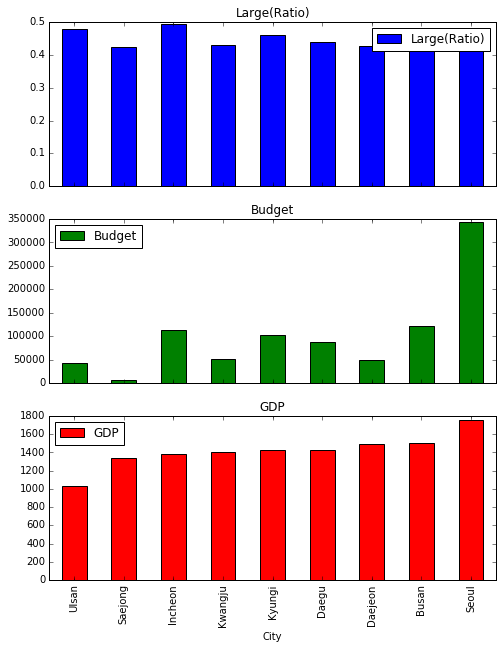

In [69]:
# Table and Graph
print(Combined)
Combined.plot(kind='bar',subplots=True, figsize=(8,10))

In [70]:
# Define and modify the function correlation

def plot_correlation( ds, x, y, c, ylim=(0,500000) ):
    plt.xlim(.35,.65)
    plt.ylim(ylim[0],ylim[1])
    plt.scatter(ds[x], ds[y], alpha=0.6, s=50, c=c) 
    for abc, row in ds.iterrows():
        plt.text(row[x], row[y],abc )
    plt.xlabel(x)
    plt.ylabel(y)
    # Correlation 
    trend_variable = np.poly1d(np.polyfit(ds[x], ds[y], 1))
    trendx = np.linspace(0.3, 0.62, 4)
    plt.plot(trendx, trend_variable(trendx), color=c) 
    r = sp.stats.pearsonr(ds[x],ds[y])
    plt.text(trendx[3], trend_variable(trendx[3]),'r={:.3f}'.format(r[0]), color = c )
    plt.tight_layout()

In [71]:
import scipy as sp
from scipy import stats  

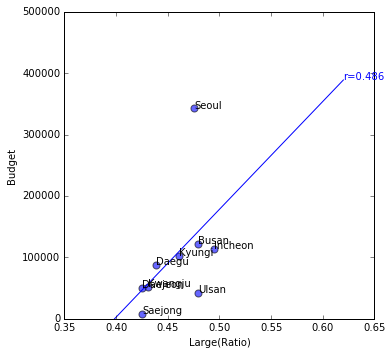

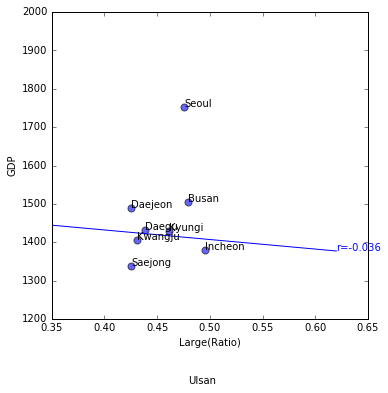

In [72]:
# Budget and GDP Relationship with Big Apartment

plot01 = plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plot_correlation( Combined,'Large(Ratio)' , 'Budget', 'b' )
plot02 = plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plot_correlation( Combined, 'Large(Ratio)', 'GDP', 'b' , ylim=(1200,2000))

We find that the ratio of large apartment has high correlation with city budget, and not much with average GDP of the city.

### Conclusion

We found that the ratio of Large Apartments were relatively consistent regardless of the city, and that the number of large apartments correlated postively with the city budget, but no relationship was found between the city GDP and number of large apartments, which is implies that city's budgets are not necessarily directly correlated with the city's GDPs. 

..